In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def flip_coin(n_flip):
    head, tail = 0, 0
    for i in range(0, n_flip):
        if np.random.randint(0, 2) == 1:
            head += 1
        else:
            tail += 1
    return head/n_flip

flip_coin(1000)

0.502

In [2]:
probs = []
for i in range(1, 1000):
    result = (i, flip_coin(i))
    probs.append(result)

In [3]:
df = pd.DataFrame(probs)
df.columns = ['Tries', 'Probability']
df.head()

,Tries,Probability
0,1,1.000000
1,2,0.500000
2,3,0.666667
3,4,0.000000
4,5,0.400000


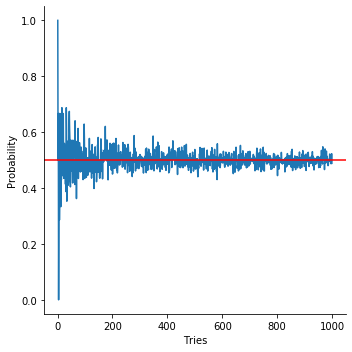

In [4]:
sns.relplot(x="Tries", y="Probability", kind="line", data=df)
plt.axhline(0.5, color='Red')

In [5]:
df = pd.read_csv('../Data/drug_trial.csv')
df.head(10)

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8
5,Control,6
6,Control,4
7,Control,6
8,Control,5
9,Control,5


In [6]:
df.tail()

,group,mean_duration
75,Experimental,4
76,Experimental,3
77,Experimental,3
78,Experimental,5
79,Experimental,5


In [7]:
df['group'].unique()

array(['Control', 'Experimental'], dtype=object)

In [8]:
control_mean = df[df['group'] == 'Control'].mean()
experimental_mean = df[df['group'] == 'Experimental'].mean()

print('Control mean:', control_mean, '\nExperimental mean:', experimental_mean)

Control mean: mean_duration    5.4
dtype: float64 
Experimental mean: mean_duration    4.8
dtype: float64


Mean differences mean: -0.0009986186801857297


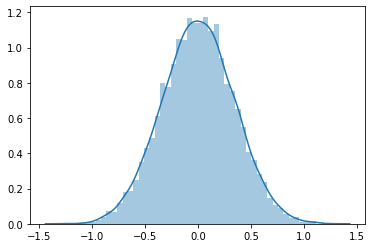

In [9]:
n = 10000
mean_differences = []
data_points = list(df['mean_duration'])

for i in range(n):
    group_1 = []
    group_2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0, 2)
        if random_assignment:
            group_1.append(data_point)
        else:
            group_2.append(data_point)

    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences.append(trial_mean_difference)

print('Mean differences mean:', np.array(mean_differences).mean())    
sns.distplot(mean_differences)

In [10]:
mean_differences = pd.DataFrame(mean_differences)
exceeds_mean_diff = len(mean_differences[mean_differences[0] >= 0.6])
exceeds_mean_diff

389

In [11]:
p_value = exceeds_mean_diff / n
p_value

0.0389